In [124]:
import pandas as pd

In [125]:
import numpy as np
import matplotlib.pyplot as plt

In [126]:
import csv

In [127]:
!pip install datascience

In [128]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [129]:
#downloading the dataset - RAW Food Pantry Data into a Table
raw_data = Table().read_table("RAW Food Pantry Data -- Deidentified - Sheet1.csv")

In [130]:

def just_month(dates, month):
    """ returns dates that are in the month.
    arguments: an array of dates and a string that represents the month."""
    
    m = []
    if len(month) > 1:
        for date in dates:
            if (date[0] == month[0]) and (date[1]== month[1]):
                m.append(date)
    else:
        for date in dates:
            if date[0] == month[0] and date[1] == '/':
                m.append(date)
    return m
            
    

In [131]:
#Original Raw Data - Months not separated
raw_data.show()

date,id
12/1/16 11:22,408
12/1/16 11:17,233
12/1/16 11:18,1398
12/1/16 11:19,1036
12/1/16 11:39,1433
12/1/16 11:44,904
12/1/16 11:54,1360
12/1/16 12:00,1078
12/1/16 12:20,851
12/1/16 12:33,1495


In [132]:
#Shortened tables -- months not fully separated.

jan = raw_data.where("date", are.containing("1/"))
feb = raw_data.where("date", are.containing("2/"))
mar = raw_data.where("date", are.containing("3/"))
apr = raw_data.where("date", are.containing("4/"))
may = raw_data.where("date", are.containing("5/"))
jun = raw_data.where("date", are.containing("6/"))
jul = raw_data.where("date", are.containing("7/"))
aug = raw_data.where("date", are.containing("8/"))
sept = raw_data.where("date", are.containing("9/"))
octo = raw_data.where("date", are.containing("10"))
nov = raw_data.where("date", are.containing("11"))
dec = raw_data.where("date", are.containing("12"))

In [133]:
def month(month_table, month_number):
    """ returns a table that contains only the given month.
    arguments: shortened month table, and 
    string representing the number of the month"""
    return Table().with_column("date", just_month(month_table.column("date"), month_number))

In [134]:
# months separated into different tables -- reassigning the old tables.
jan = month(jan, "1")
feb = month(feb, "2")
mar = month(mar, "3")
apr = month(apr, "4")
may = month(may, "5")
jun = month(jun, "6")
jul = month(jul, "7")
aug = month(aug, "8")
sept = month(sept, "9")
octo = month(octo, "10")
nov = month(nov, "11")
dec = month(dec, "12")

In [139]:
# creating a table that contains that number of times the food pantry was visited each month.
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
visits = [jan.num_rows, feb.num_rows, mar.num_rows, apr.num_rows, may.num_rows, jun.num_rows, jul.num_rows, aug.num_rows, sept.num_rows, octo.num_rows, nov.num_rows, dec.num_rows]

visits_per_month = Table().with_columns("Month", month_names, "Number of Visits", visits)

visits_per_month.show()
    

Month,Number of Visits
January,83
February,301
March,397
April,415
May,136
June,332
July,368
August,327
September,676
October,252


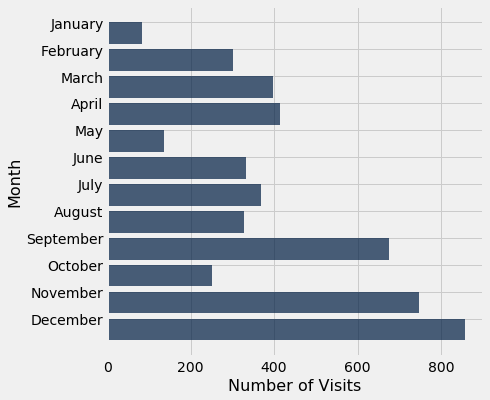

In [231]:
# visualizing visits_per_month
visits_per_month.barh("Month", "Number of Visits")

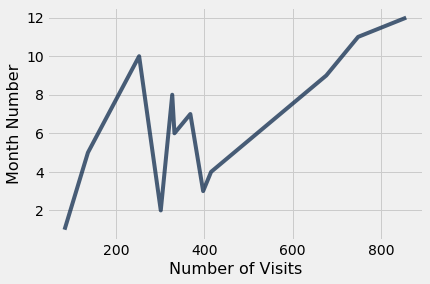

In [239]:
#Converting Months in visits_per_month table to numerical values (month numbers).
visits_per_month_quantitative = visits_per_month.drop("Month").with_column("Month Number", np.arange(1, 13))

#Creating line plot of visit_per_month.
visits_per_month_quantitative.plot("Number of Visits")

In [190]:
#separating months into weeks.
#note: "weeks" are separated into 7 day intervals & may not represent actual week(sun - sat)
def weeks_of_month(month_table, month_number):
    """Returns a list that contains different lists for the weeks.
    Arguments: table containing dates for month and string that represents month number."""
    week_1 = []
    week_2 = []
    week_3 = []
    week_4 = []
    week_5 = []
    if len(month_number) > 1:
        for date in month_table.column("date"):
            if date[4] == '/':
                week_1.append(date)
            elif ((date[3] + date[4]) >= "8") and ((date[3] + date[4]) <= "14"):
                week_2.append(date)
            elif ((date[3] + date[4]) > "14") and ((date[3] + date[4]) <= "21"):
                week_3.append(date)
            elif ((date[3] + date[4]) > "21") and ((date[3] + date[4]) <= "28"):
                week_4.append(date)
            else: 
                week_5.append(date)
        return [week_1, week_2, week_3, week_4, week_5]    
    else:
        for date in month_table.column("date"):
            if date[3] == '/':
                week_1.append(date)
            elif ((date[2] + date[3]) >= "8") and ((date[2] + date[3]) <= "14"):
                week_2.append()
            elif ((date[2] + date[3]) > "14") and ((date[2] + date[3]) <= "21"):
                week_3.append(date)
            elif ((date[2] + date[3]) > "21") and ((date[2] + date[3]) <= "28"):
                week_4.append(date)
            else:
                week_5.append(date)
        return [week_1, week_2, week_3, week_4, week_5]

#applying the function weeks_of_month to each month.
jan_weeks = weeks_of_month(jan, "1")
feb_weeks = weeks_of_month(feb, "2")
mar_weeks = weeks_of_month(mar, "3")
apr_weeks = weeks_of_month(apr, "4")
may_weeks = weeks_of_month(may, "5")
jun_weeks = weeks_of_month(jun, "6")
jul_weeks = weeks_of_month(jul, "7")
aug_weeks = weeks_of_month(aug, "8")
sept_weeks = weeks_of_month(sept, "9")
octo_weeks = weeks_of_month(octo, "10")
nov_weeks = weeks_of_month(nov, "11")
dec_weeks = weeks_of_month(dec, "12")

In [191]:
#Converting the weeks into tables for each month
def weeks_table(weeks_lst):
    """ Returns table with 2 columns: Week Number and Number of Visits(during that week)
    Arguments: list that contains lists for visits each week."""
    return Table().with_columns("Week Number", [1, 2, 3, 4, 5], "Number of Visits", [len(weeks_lst[0]), len(weeks_lst[1]), len(weeks_lst[2]), len(weeks_lst[3]), len(weeks_lst[4])])

jan_weeks_t = weeks_table(jan_weeks)
feb_weeks_t = weeks_table(feb_weeks)
mar_weeks_t = weeks_table(mar_weeks)
apr_weeks_t = weeks_table(apr_weeks)
may_weeks_t = weeks_table(may_weeks)
jun_weeks_t = weeks_table(jun_weeks)
jul_weeks_t = weeks_table(jul_weeks)
aug_weeks_t = weeks_table(aug_weeks)
sept_weeks_t = weeks_table(sept_weeks)
octo_weeks_t = weeks_table(octo_weeks)
nov_weeks_t = weeks_table(nov_weeks)
dec_weeks_t = weeks_table(dec_weeks)

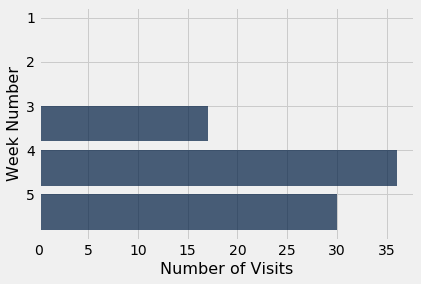

In [194]:
#January 
jan_weeks_t.barh("Week Number", "Number of Visits")

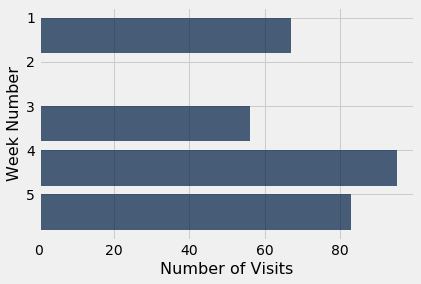

In [195]:
#February
feb_weeks_t.barh("Week Number", "Number of Visits")

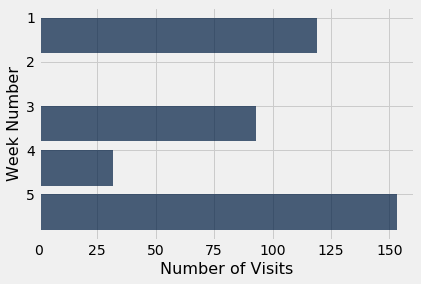

In [196]:
#March
mar_weeks_t.barh("Week Number", "Number of Visits")

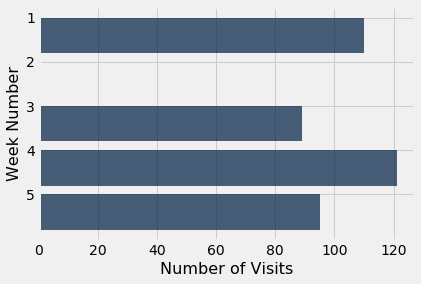

In [197]:
#April
apr_weeks_t.barh("Week Number", "Number of Visits")

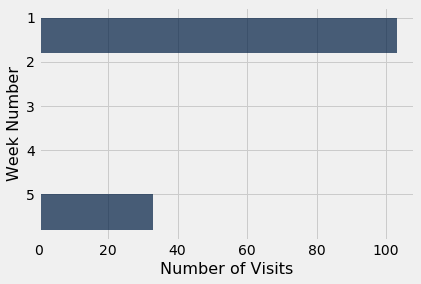

In [198]:
#May
may_weeks_t.barh("Week Number", "Number of Visits")

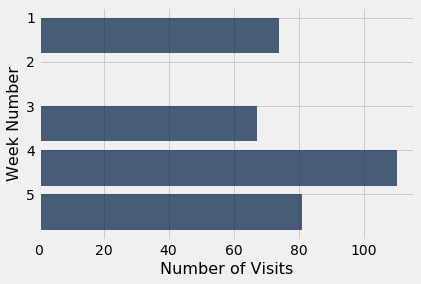

In [199]:
#June
jun_weeks_t.barh("Week Number", "Number of Visits")

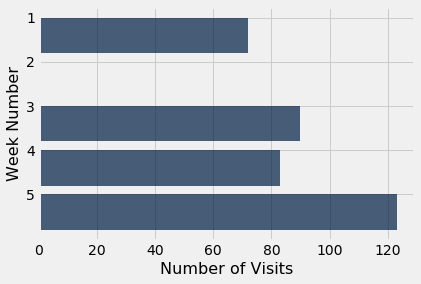

In [200]:
#July
jul_weeks_t.barh("Week Number", "Number of Visits")

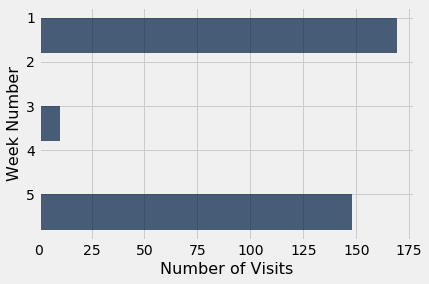

In [201]:
#August
aug_weeks_t.barh("Week Number", "Number of Visits")

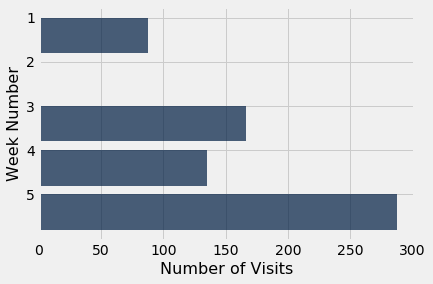

In [202]:
#September
sept_weeks_t.barh("Week Number", "Number of Visits")

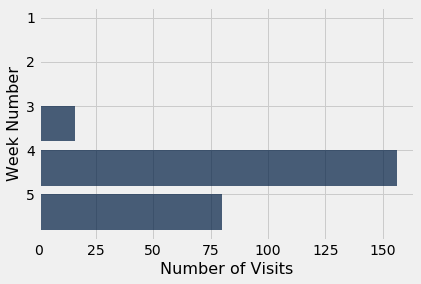

In [203]:
#October
octo_weeks_t.barh("Week Number", "Number of Visits")

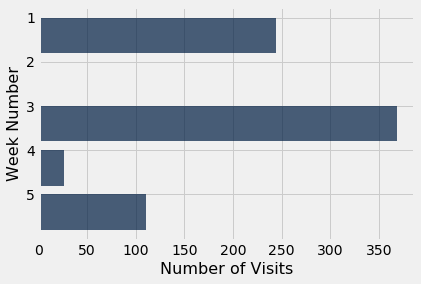

In [204]:
#November
nov_weeks_t.barh("Week Number", "Number of Visits")

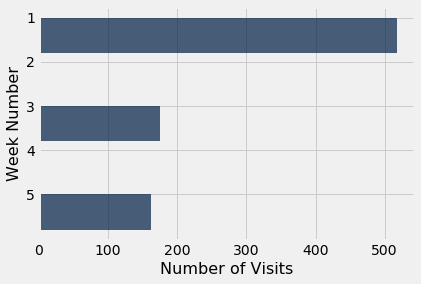

In [205]:
#December
dec_weeks_t.barh("Week Number", "Number of Visits")

In [229]:
#Combining all of the tables containing the weeks.
weeks_table = jan_weeks_t.join("Week Number", feb_weeks_t).join("Week Number", mar_weeks_t).join("Week Number", apr_weeks_t).join(
"Week Number", may_weeks_t).join("Week Number", jun_weeks_t).join("Week Number", jul_weeks_t).join(
"Week Number", aug_weeks_t).join("Week Number", sept_weeks_t).join("Week Number", octo_weeks_t).join(
    "Week Number", nov_weeks_t).join("Week Number", dec_weeks_t)

weeks_table.relabel("Number of Visits", "Number of Visits_1")

Week Number,Number of Visits_1,Number of Visits_2,Number of Visits_3,Number of Visits_4,Number of Visits_5,Number of Visits_6,Number of Visits_7,Number of Visits_8,Number of Visits_9,Number of Visits_10,Number of Visits_11,Number of Visits_12
1,0,67,119,110,103,74,72,169,88,0,244,517
2,0,0,0,0,0,0,0,0,0,0,0,0
3,17,56,93,89,0,67,90,10,166,16,368,176
4,36,95,32,121,0,110,83,0,135,156,26,2
5,30,83,153,95,33,81,123,148,287,80,110,162


In [267]:
# Comparing number of visits during seasons of the year.
    #Spring: March 1 - May 31.
    #Summer: June 1 - August 31.
    #Fall: September 1 - November 30.
    #Winter: December 1 - February 29 (2016 was a Leap Year).

spring = visits_per_month.take(np.arange(2, 5))
summer = visits_per_month.take(np.arange(5, 8))
fall = visits_per_month.take(np.arange(8, 11))

dec_visits = visits_per_month.where("Month", are.equal_to(
    "December")).column("Number of Visits")[0]
jan_visits = visits_per_month.where("Month", are.equal_to(
    "January")).column("Number of Visits")[0]
winter = Table().with_columns("Month", ["December", "January"], 
                              "Number of Visits", 
                              [dec_visits, jan_visits])


(Month | Number of Visits
 March | 397
 April | 415
 May   | 136, Month  | Number of Visits
 June   | 332
 July   | 368
 August | 327)

In [268]:
spring

Month,Number of Visits
March,397
April,415
May,136


In [269]:
summer

Month,Number of Visits
June,332
July,368
August,327


In [270]:
fall

Month,Number of Visits
September,676
October,252
November,748


In [271]:
winter

Month,Number of Visits
December,857
January,83


In [276]:
#Totaling the number of visits during each season.
spring_total = sum(spring.column("Number of Visits"))
summer_total = sum(summer.column("Number of Visits")) 
fall_total = sum(fall.column("Number of Visits"))
winter_total =  sum(winter.column("Number of Visits"))

#Putting the totals into a list
seasons_totals = [spring_total, summer_total, fall_total, winter_total]
seasons_totals

[948, 1027, 1676, 940]

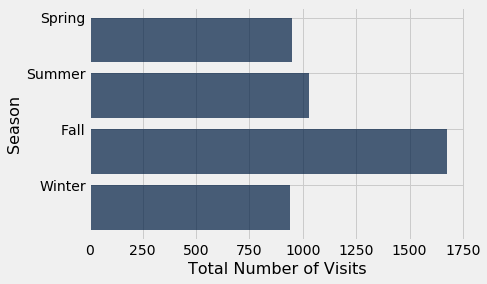

In [281]:
#Visualizing the number of visits during each season.

seasons_table = Table().with_columns("Season", ["Spring", "Summer", "Fall", "Winter"], 
                                     "Total Number of Visits", seasons_totals)
seasons_table.barh("Season", "Total Number of Visits")

In [282]:
jan

date
1/13/16 0:00
1/13/16 0:00
1/13/16 0:00
1/14/16 10:45
1/14/16 10:45
1/14/16 10:56
1/14/16 10:59
1/15/16 10:45
1/15/16 11:21
1/15/16 11:39


In [284]:
# Attaining the times from the raw data.

def times(raw_table):
    """ Returns a list that consists of times (each element is a time)
    Arguments: raw_data"""
    time = []
    for date in raw_table.column("date"):
            if date[1] == '/':
                time.append(date[8:])
            else:
                time.append(date[9:])
    return time

visit_times = times(raw_data)
visit_times

['1:22',
 '1:17',
 '1:18',
 '1:19',
 '1:39',
 '1:44',
 '1:54',
 '2:00',
 '2:20',
 '2:33',
 '2:54',
 '3:18',
 '3:18',
 '3:25',
 '3:46',
 '3:47',
 '3:49',
 '3:53',
 '3:53',
 '4:05',
 '4:16',
 '4:16',
 '4:17',
 '4:23',
 '4:32',
 '4:34',
 '5:17',
 '5:18',
 '5:18',
 '5:18',
 '5:37',
 '5:37',
 '5:38',
 '5:40',
 '5:41',
 '5:42',
 '5:43',
 '5:52',
 '6:17',
 '6:37',
 '7:04',
 '7:04',
 '7:18',
 '7:19',
 '7:23',
 '7:23',
 '7:39',
 '7:51',
 '7:55',
 '7:59',
 '8:04',
 '8:13',
 '9:11',
 '9:39',
 '0:03',
 '0:10',
 '0:20',
 '0:20',
 '0:20',
 '0:23',
 '0:23',
 '0:23',
 '0:24',
 '0:25',
 '0:25',
 '0:25',
 '0:29',
 '0:29',
 '0:34',
 '0:34',
 '0:35',
 '0:40',
 '0:53',
 '0:53',
 '0:54',
 '0:54',
 '0:56',
 '0:57',
 '0:59',
 '0:59',
 '1:00',
 '1:03',
 '1:07',
 '1:08',
 '1:12',
 '1:16',
 '1:18',
 '1:18',
 '1:19',
 '1:21',
 '1:24',
 '1:25',
 '1:25',
 '1:29',
 '1:30',
 '1:30',
 '1:32',
 '1:35',
 '1:36',
 '1:39',
 '1:40',
 '1:41',
 '1:42',
 '1:45',
 '1:46',
 '1:51',
 '1:51',
 '1:52',
 '1:54',
 '1:55',
 '2:00',
 

In [287]:
#Putting the times into a table.
times_table = Table().with_column("Times", visit_times)
times_table

Times
1:22
1:17
1:18
1:19
1:39
1:44
1:54
2:00
2:20
2:33
